 # Introduction

 This goal of this project is to analyze biodiversity data from the National Parks Service,
particularly around various species observed in different national park locations.

This project will scope, analyze, prepare, plot data,
and seek to explain the findings from the analysis.

Here are a few questions that this project has sought to answer:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which animal is most prevalent and what is their distribution amongst parks?

**Data sources**:

Both `Observations.csv` and `Species_info.csv` was provided by [Codecademy.com](https://www.codecademy.com).

Note: The data for this project is inspired by real data, but is mostly fictional.

### Project Goals

In this project the perspective will be through a biodiversity analyst for the National Parks Service. The National Park Service wants to ensure the survival of at-risk species, to maintain the level of biodiversity within their parks. Therefore, the main objectives as an analyst will be understanding characteristics about the species and their conservations status, and those species and their relationship to the national parks. Some questions that are posed:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which animal is most prevalent and what is their distribution amongst parks?

### Data

This project has two data sets that came with the package. The first `csv` file has information about each species and another has observations of species with park locations. This data will be used to analyze the goals of the project. 

### Analysis

In this section, descriptive statistics and data visualization techniques will be employed to understand the data better. Statistical inference will also be used to test if the observed values are statistically significant. Some of the key metrics that will be computed include: 

1. Distributions
1. counts
1. relationship between species
1. conservation status of species
1. observations of species in parks. 

In [7]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

In [8]:
# loading data

species= pd.read_csv('species_info.csv')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


#### species

The `species_info.csv` contains information on the different species in the National Parks. The columns in the data set include:
- **category** - The category of taxonomy for each species
- **scientific_name** - The scientific name of each species
- **common_names** - The common names of each species
- **conservation_status** - The species conservation status

In [9]:
observations = pd.read_csv('observations.csv')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


#### observations

The `Observations.csv` contains information from recorded sightings of different species throughout the national parks in the past 7 days. The columns included are:

- **scientific_name** - The scientific name of each species
- **park_name** - The name of the national park
- **observations** - The number of observations in the past 7 days

In [10]:
#checking the dimensions of the data

print(f'species shape: {species.shape}')
print(f'species shape: {observations.shape}')

species shape: (5824, 4)
species shape: (23296, 3)


In [11]:
# I- Exploring the data -
# number of unique species:

print(f"number of species: {species.scientific_name.nunique()}")

number of species: 5541


In [12]:
# number and list of unique categories:

print(f"number of categories: {species.category.nunique()}")
print(f"categories: {species.category.unique()}")

number of categories: 7
categories: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [13]:
# count of each category

species.groupby('category').scientific_name.count()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
Name: scientific_name, dtype: int64

In [14]:
# conservation_status column

print(f"number of uniqueconservation statuses: {species.conservation_status.nunique()}")
print(f"list of unique conservation statuses: {species.conservation_status.unique()}")

number of uniqueconservation statuses: 4
list of unique conservation statuses: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [15]:
# count of conservation statuses

print(f"na values: {species.conservation_status.isna().sum()}")
species.groupby('conservation_status').size()

na values: 5633


conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64

**observations:**


In [17]:
print(f"number of parks: {observations.park_name.nunique()}")
print(f"unique parks: {observations.park_name.unique()}")

number of parks: 4
unique parks: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


In [18]:
# number of total observations
# and number of observations per park

print(f"number of observations: {observations.observations.sum()}")
print(observations.groupby('park_name').observations.sum())

number of observations: 3314739
park_name
Bryce National Park                     576025
Great Smoky Mountains National Park     431820
Yellowstone National Park              1443562
Yosemite National Park                  863332
Name: observations, dtype: int64


## Analysis

This section will begin analyzing the data after the initial exploration. First task will be to clean and explore the `conservation_status` column in `species`. 

The column `conservation_status` has several possible values:
- `Species of Concern`: declining or appear to be in need of conservation
- `Threatened`: vulnerable to endangerment in the near future
- `Endangered`: seriously at risk of extinction
- `In Recovery`: formerly `Endangered`, but currently neither in danger of extinction throughout all or a significant portion of its range

In the exploration, a lot of `nan` values were detected. These values will need to be converted to `No Intervention`.

In [20]:
species.conservation_status.fillna('No Intervention', inplace= True)
species.groupby('conservation_status').size()

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64

In [21]:
conservationCategory = species[species.conservation_status != "No Intervention"]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()

conservationCategory

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


For those in the `Endangered status`, 7 were mammals and 4 were birds.
In the In `Recovery status`, there were 3 birds and 1 mammal, which could possibly mean that
the birds are bouncing back more than the mammals,
they also show to be the highest species of concern.


Text(0.5, 1.0, 'Number of Species per Category for each Conservation Status')

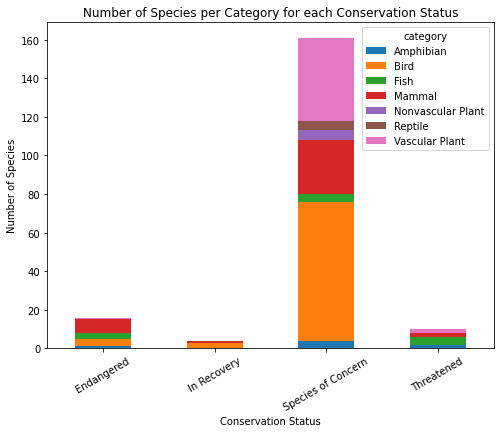

In [23]:
ax= conservationCategory.plot(kind = 'bar', figsize=(8,6), 
                              stacked= True)
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species")
plt.xticks(rotation= 30)
plt.title('Number of Species per Category for each Conservation Status')


The next question is if certain types of species are more likely to be endangered? This can be answered by creating a new column called `is_protected` and include any species that had a value other than `No Intervention`.

In [24]:
species['is_protected'] = species.conservation_status != 'No Intervention'
species.head()

,category,scientific_name,common_names,conservation_status,is_protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False


Once the new column is created, group by `category` and `is_protected` to show the break down of each species type and protection status. 

It's easy to see that Birds, Vascular Plants, and Mammals have a higher absolute number of species protected. 

In [25]:
category_counts = species.groupby(['category', 'is_protected'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name')\
                        .reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']

category_counts['percent_protected']= round(category_counts.protected / \
                (category_counts.protected + category_counts.not_protected), 3)*100

category_counts


,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.9
1,Bird,413,75,15.4
2,Fish,115,11,8.7
3,Mammal,146,30,17.0
4,Nonvascular Plant,328,5,1.5
5,Reptile,73,5,6.4
6,Vascular Plant,4216,46,1.1


Statistical Significance
This section will run some chi-squared tests to see if different species 
have statistically significant differences in conservation status rates:

The first test will be called `contingency1` 
and will test if there is a significant corrolation for mammals and birds.

In [28]:
from scipy.stats import chi2_contingency

contingency1= [[30, 146], [75, 413]]

chi2, pval, dof, exp = chi2_contingency(contingency1) 
print(pval)

0.6875948096661336


The standard p-value to test statistical significance is 0.05.
For the value retrieved from this test, the value of 0.69 is much larger than 0.05.
In the case of mammals and birds there doesn't seem to be any significant relationship between them i.e. the variables independent. 

In [30]:
# The next pair, is going to test the difference between Reptile and Mammal:

contingency2 = [[30, 146], [5, 73]]

chi2, pval, dof, exp = chi2_contingency(contingency2)
print(pval)

0.03835559022969898


This time the p-value is 0.039 which is below the standard threshold of 0.05
which can be taken as that there is a statistically significant relation between 
the species and the conservation percentage for mammals and reptiles .

Mammals are shown to have a statistically significant higher rate
of protection compared with Reptiles.

Species in Parks
The next step is to look at the common names from species to get an idea of the
most prevalent animals in the dataset.
The data will be split up into individual names.

In [36]:
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text= text.replace(punctuation, '')
    return text

common_Names = species[species.category == 'Mammal']\
        .common_names\
        .apply(remove_punctuations)\
        .str.split().tolist()
common_Names[:6]


[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

cleaning up duplicate words in each row not to be counted more than once for each species


In [60]:
cleanRows = []

for item in common_Names:
    item = list(dict.fromkeys(item))
    cleanRows.append(item)

cleanRows[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison'],
 ['Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

Next the words need to be collapsed into one list for easier use

In [67]:
res= []
for r in cleanRows:
    for i in r:
        res.append(i)
print(res)
        

['Gappers', 'RedBacked', 'Vole', 'American', 'Bison', 'Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated', 'Domestic', 'Sheep', 'Mouflon', 'Red', 'Feral', 'Wapiti', 'Or', 'Elk', 'WhiteTailed', 'Deer', 'Feral', 'Hog', 'Wild', 'Pig', 'Coyote', 'Gray', 'Wolf', 'Red', 'Wolf', 'Common', 'Gray', 'Fox', 'Black', 'Fox', 'Cross', 'Red', 'Silver', 'Red', 'Fox', 'Mountain', 'Lion', 'Wild', 'Cat', 'Wildcat', 'Bobcat', 'Panther', 'Mountain', 'Lion', 'Striped', 'Skunk', 'Eastern', 'Spotted', 'Skunk', 'River', 'Otter', 'Northern', 'River', 'Otter', 'Fisher', 'Mink', 'Or', 'Weasel', 'LongTailed', 'Weasel', 'Least', 'Weasel', 'Mink', 'Common', 'Raccoon', 'Black', 'Bear', 'Rafinesques', 'BigEared', 'Bat', 'Big', 'Brown', 'Bat', 'SilverHaired', 'Bat', 'Eastern', 'Red', 'Bat', 'Hoary', 'Bat', 'Mississippi', 'Myotis', 'Southeastern', 'Gray', 'Myotis', 'Keens', 'Myotis', 'Eastern', 'SmallFooted', 'Bat', 'Myotis', 'Little', 'Brown', 'Bat', 'Myotis', 'Northern', 'LongEared', 'Bat', 'Myotis', 'Indiana', '

In [70]:
# Counting the occurances of names in the list res:
words_counted= []

for i in res:
    x= res.count(i)
    words_counted.append((i, x))
pd.DataFrame(set(words_counted), columns= ['Word', 'Count']).sort_values('Count', ascending= False)

,Word,Count
76,Bat,23
193,Shrew,18
26,Myotis,17
156,Mouse,16
184,Chipmunk,13
...,...,...
91,PiOn,1
95,Norway,1
97,Smoky,1
98,Yellow,1


its noticed that `Bat` occured 23 times while shrew came up 18 times

In the data, there are several different scientific names for different types of bats.
The next task is to figure out which rows of `species` are referring to bats.
A new column made up of boolean values will be created to check if `is_bat` is `True`.

In [71]:
species['is_bat']= species.common_names.str.contains(r"\bBat\b", regex= True)
species.head(10)

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,No Intervention,False,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",No Intervention,False,False
7,Mammal,Canis latrans,Coyote,Species of Concern,True,False
8,Mammal,Canis lupus,Gray Wolf,Endangered,True,False
9,Mammal,Canis rufus,Red Wolf,Endangered,True,False


In [79]:
species[species.is_bat]

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",No Intervention,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,No Intervention,False,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
40,Mammal,Nycticeius humeralis,Evening Bat,No Intervention,False,True


In [81]:
bat_observations = observations.merge(species[species.is_bat])
bat_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_bat
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,True
1,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,True
2,Lasiurus blossevillii,Yosemite National Park,123,Mammal,Western Red Bat,Species of Concern,True,True
3,Lasiurus blossevillii,Yellowstone National Park,221,Mammal,Western Red Bat,Species of Concern,True,True
4,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,No Intervention,False,True
...,...,...,...,...,...,...,...,...
139,Myotis sodalis,Yellowstone National Park,68,Mammal,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
140,Myotis leibii,Yosemite National Park,132,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
141,Myotis leibii,Bryce National Park,84,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
142,Myotis leibii,Great Smoky Mountains National Park,49,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True


In [82]:
# Let's see how many total bat observations(across all species) were made at each national park.

bat_observations.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411
2,Yellowstone National Park,8362
3,Yosemite National Park,4786


In [84]:
# Now let's see each park broken down by protected bats vs. non-protected bat sightings

obs_by_park = bat_observations.groupby(['park_name', 'is_protected']).observations.sum().reset_index()
obs_by_park

,park_name,is_protected,observations
0,Bryce National Park,False,1596
1,Bryce National Park,True,1837
2,Great Smoky Mountains National Park,False,1299
3,Great Smoky Mountains National Park,True,1112
4,Yellowstone National Park,False,4044
5,Yellowstone National Park,True,4318
6,Yosemite National Park,False,2345
7,Yosemite National Park,True,2441


It seems that every park except for the Great Smoky Mountains National Park has more sightings of protected bats than not.
This could be considered a great sign for bats.

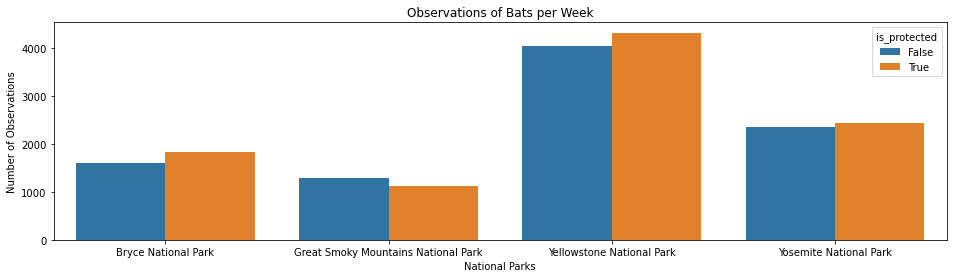

In [85]:
# Below is a plot from the output of the last data manipulation.

plt.figure(figsize=(16, 4))
sns.barplot(x=obs_by_park.park_name, y= obs_by_park.observations, hue=obs_by_park.is_protected)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Bats per Week')
plt.show()

From this chart one can see that Yellowstone and Bryce National Parks seem to be doing a great job with their bat populations
since there are more sightings of protected bats compared to non-protected species.
The Great Smoky Mountains National Park might need to beef up there efforts in conservation as they have seen
more non-protected species.

## Conclusions

The project was able to make several data visualizations and inferences about the various species in four of the National Parks that comprised this data set.

This project was also able to answer some of the questions first posed in the beginning:

- What is the distribution of conservation status for species?
    - The vast majority of species were not part of conservation.(5,633 vs 191)
- Are certain types of species more likely to be endangered?
    - Mammals and Birds had the highest percentage of being in protection.
- Are the differences between species and their conservation status significant?
    - While mammals and Birds did not have significant difference in conservation percentage, mammals and reptiles exhibited a statistically significant difference.
- Which animal is most prevalent and what is their distribution amongst parks?
    - the study found that bats occurred the most number of times and they were most likely to be found in Yellowstone National Park.
  